<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
layer of artifitial neurons that face input data

### Hidden Layer:
layers of function that are not visible to enduser, they are constructed by connected nodes with weight, and activation functions defined for each node
### Output Layer:
Last layer of neurons that give output 

### Neuron:
nodes in the neural network 

### Weight:
relative importance for each neuron function

### Activation Function:
In Artificial Neural Networks activation functions (transfer function) decide how much signal to pass onto the next layer. Activation functions also help normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.

### Node Map:
how to function are related to each other

### Perceptron:
An very simple one-neuron single-layered algorithm for supervised binary classification. 


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

1. Start with arbitrary chosen or random values for the network parameters (wij weights and bj biases).
2. Feed a set of input data and pass them flow through the network to obtain the first round of prediction.
3. Compare the output with expected preduction and calculate the loss (error).
4. Backpropagate this loss to each of the parameters that make up the model of the neural network.
5. Use this propagated information to update the parameters of the neural network with the gradient descent in a way that the total loss is reduced.
6. Repeat 2-5 unitl we have a good model.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [1,0,1,0],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df.head()

,x1,x2,y
0,1,0,1
1,0,0,1
2,1,1,1
3,0,1,0


In [2]:
##### Your Code Here #####
import numpy as np

def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx*(1-sx)

In [3]:
import matplotlib.pyplot as plt
test_x = np.arange(-5, 5, 0.01)
test_y = sigmoid(test_x)
test_y_prime = sigmoid_derivative(test_x)
plt.plot(test_x, test_y)
plt.plot(test_x, test_y_prime)
plt.legend(['f', "f '"])
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
weights = np.random.random([3,1])-1
weights

array([[-0.59594864],
       [-0.49304213],
       [-0.37792039]])

In [5]:
# input with added 1 column
input1 = np.ones((len(df),1))

input2=df[['x1','x2']].to_numpy()

inputs = np.hstack((input2, input1))

outputs = df['y'].to_numpy().reshape(-1, 1)
    
for iteration in range(10000):

    weighted_sum = np.dot(inputs, weights)

    pred = sigmoid(weighted_sum)
    
    error = outputs-pred
    
    adjustments = error*sigmoid_derivative(weighted_sum)

    weights += np.dot(inputs.T, adjustments)
    
print("Input")
print(inputs)
print("weight after training")
print(weights)
print("Output after training")
print(pred)

print("Desired output")
print(outputs)

Input
[[1. 0. 1.]
 [0. 0. 1.]
 [1. 1. 1.]
 [0. 1. 1.]]
weight after training
[[ 8.7878643 ]
 [-8.58070236]
 [ 4.36358881]]
Output after training
[[0.99999806]
 [0.98742683]
 [0.98975532]
 [0.01452773]]
Desired output
[[1]
 [1]
 [1]
 [0]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [6]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [7]:
df = diabetes.copy()
features = list(df)[:-1]

X = df[features]
y = df['Outcome']

In [8]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

class Perceptron:
   
    def __init__(self, rate = 0.005, n_iter = 10):
        self.n_iter = n_iter
    
    def __sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx*(1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        self.weights = np.random.random([1+X.shape[1],1]) # n*1 zeros
        self.errors = np.zeros([y.shape[0],1]) 
        X = X.to_numpy()
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
        
        inputs = np.hstack((np.ones([X.shape[0],1]), X))
        outputs = y.to_numpy()

        for i in range(self.n_iter):
            weighted_sum = np.matmul(inputs, self.weights) 
            pred = self.__sigmoid(weighted_sum)
            err = outputs-pred
            err_slope = self.__sigmoid_derivative(weighted_sum)
            adjustments = np.dot(err, err_slope)
            self.weights += np.dot(np.transpose(inputs), adjustments)
            self.errors=err
        return self
    
    
    def predict(self, X):
        """Return class label after unit step"""
        inputs = np.hstack((np.ones([X.shape[0],1]), X.to_numpy()))
        
        result = np.matmul(inputs, self.weights)
        return result

In [9]:
pn = Perceptron(0.005, 2)
pn.fit(X, y)

/Users/jing/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/Users/jing/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [10]:
pn.weights

array([[-38511.77494314],
       [ -8733.89511261],
       [-23653.26762475],
       [-21990.66953897],
       [ -8301.87256794],
       [ -3867.81790037],
       [-18582.07356368],
       [ -6603.57385952],
       [ -7924.03422811]])

In [11]:
y_pred = pn.predict(X)

In [12]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

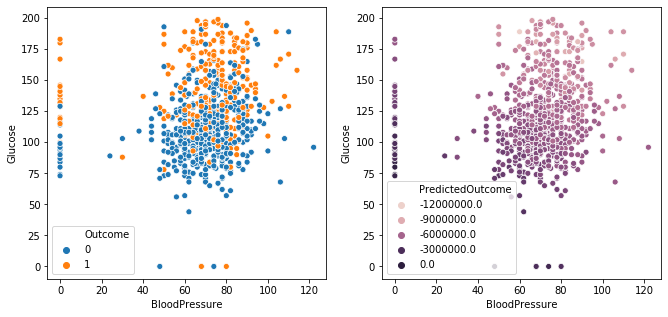

In [13]:
df_plot = df.copy()
df_plot['PredictedOutcome'] = y_pred
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(11, 5))
sns.scatterplot(x = 'BloodPressure', y = 'Glucose', data=df_plot, hue = 'Outcome', ax=ax1 )
sns.scatterplot(x = 'BloodPressure', y = 'Glucose', data=df_plot, hue = 'PredictedOutcome', ax=ax2 )
plt.show()

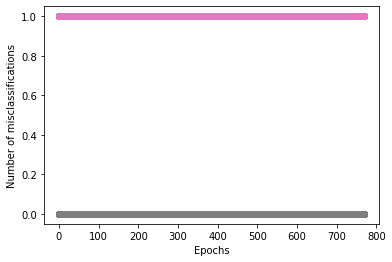

In [14]:
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?